# Phase - 1: Data analysis & preparation


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Viewing the data


In [4]:
df = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')

In [65]:
df.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [5]:
df.shape

(1190, 12)

In [6]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [8]:
df.isnull().sum()

,0
age,0
sex,0
chest pain type,0
resting bp s,0
cholesterol,0
fasting blood sugar,0
resting ecg,0
max heart rate,0
exercise angina,0
oldpeak,0


In [9]:
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


## Correlations and data distribution


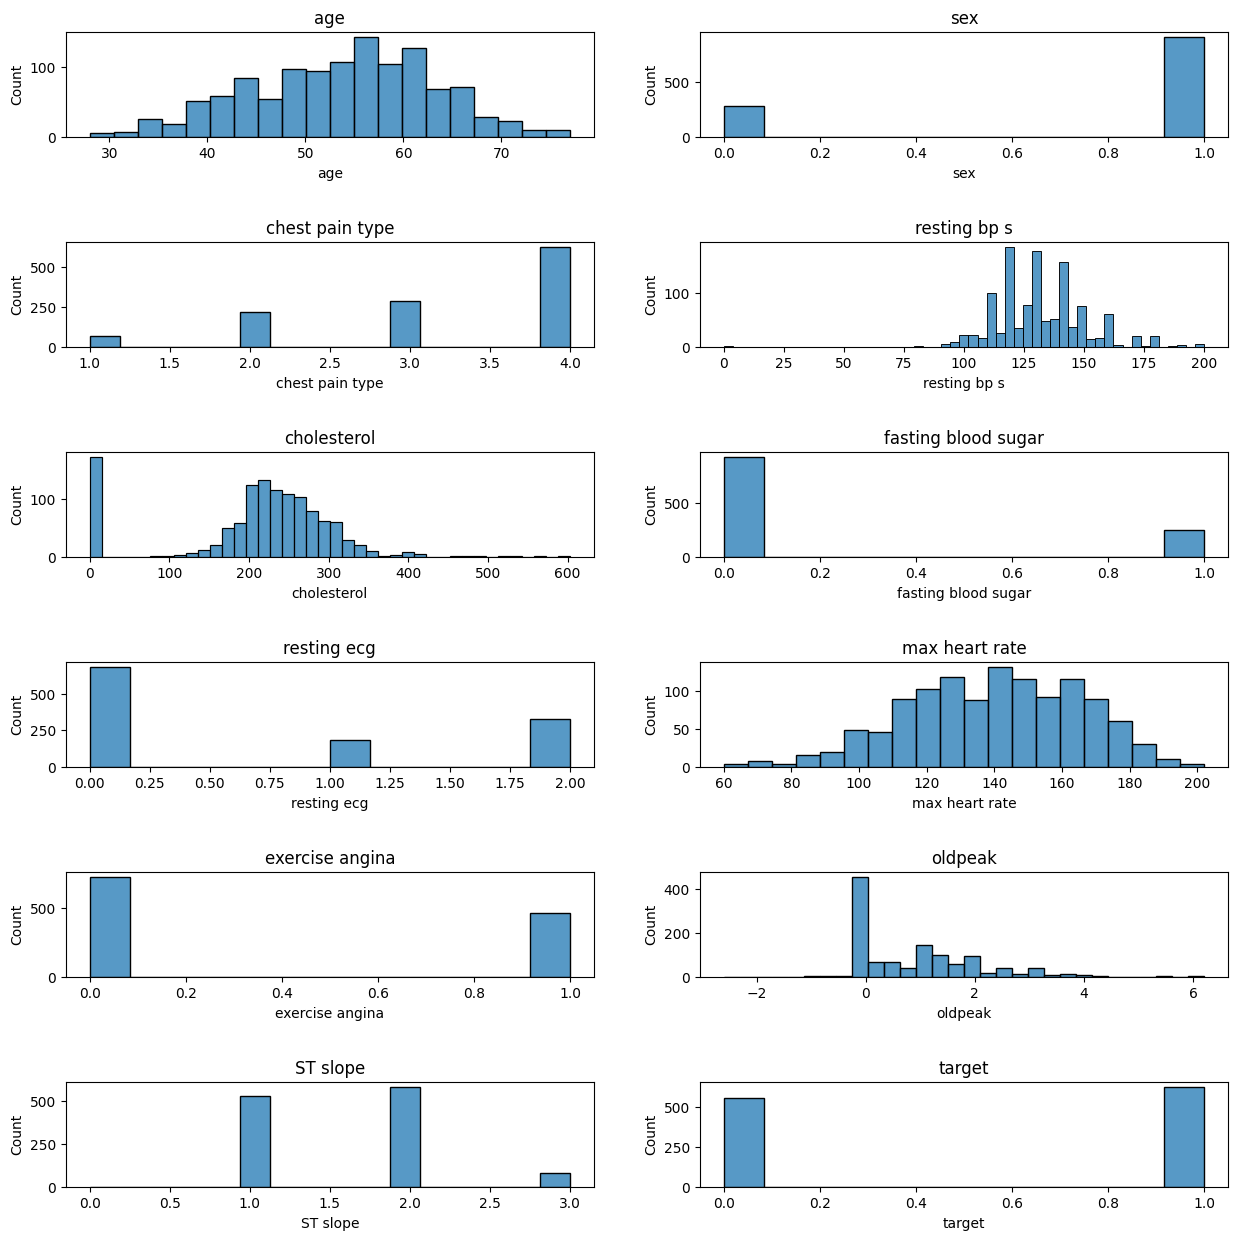

In [10]:
plt.figure(figsize=(15,15))
plt_index = 1
for c_name, content in df.items():
  ax = plt.subplot(6,2, plt_index)
  plt.subplots_adjust(hspace = 1)
  sns.histplot(content, ax=ax)
  plt.title(c_name)
  plt_index += 1

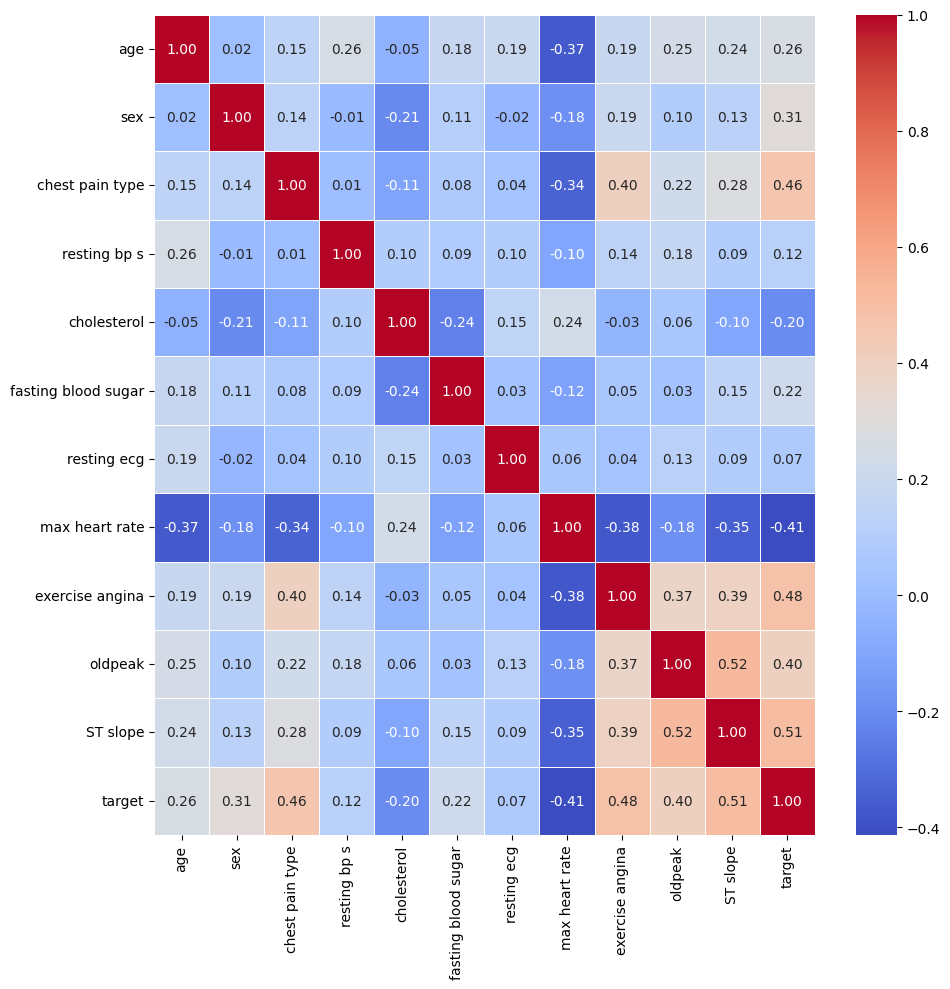

In [11]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=df.corr(), annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.tight_layout()
plt.show()

In [12]:
df["target"].value_counts()

,count
target,
1,629
0,561


## Shuffle, np conversion, and splitting

In [13]:
# set numpy print options
np.set_printoptions(formatter={'float': '{: 0.2f}'.format})

In [14]:
# convert DF to numpy array for normalizing
np_data = df.to_numpy()
np_data[:5, :]

array([[ 40.00,  1.00,  2.00,  140.00,  289.00,  0.00,  0.00,  172.00,
         0.00,  0.00,  1.00,  0.00],
       [ 49.00,  0.00,  3.00,  160.00,  180.00,  0.00,  0.00,  156.00,
         0.00,  1.00,  2.00,  1.00],
       [ 37.00,  1.00,  2.00,  130.00,  283.00,  0.00,  1.00,  98.00,
         0.00,  0.00,  1.00,  0.00],
       [ 48.00,  0.00,  4.00,  138.00,  214.00,  0.00,  0.00,  108.00,
         1.00,  1.50,  2.00,  1.00],
       [ 54.00,  1.00,  3.00,  150.00,  195.00,  0.00,  0.00,  122.00,
         0.00,  0.00,  1.00,  0.00]])

In [15]:
import random
np.random.shuffle(np_data)

In [16]:
# just checking shuffle
np_data[:5, :]

array([[ 52.00,  0.00,  4.00,  130.00,  180.00,  0.00,  0.00,  140.00,
         1.00,  1.50,  2.00,  0.00],
       [ 51.00,  0.00,  4.00,  120.00,  0.00,  1.00,  0.00,  127.00,
         1.00,  1.50,  1.00,  1.00],
       [ 64.00,  1.00,  4.00,  130.00,  223.00,  0.00,  1.00,  128.00,
         0.00,  0.50,  2.00,  0.00],
       [ 51.00,  0.00,  4.00,  114.00,  258.00,  1.00,  2.00,  96.00,
         0.00,  1.00,  1.00,  0.00],
       [ 63.00,  0.00,  2.00,  140.00,  195.00,  0.00,  0.00,  179.00,
         0.00,  0.00,  1.00,  0.00]])

In [17]:
# integer for splitting the data in the next steps
index_20percent = int(0.2 * len(np_data[:, 0]))
index_20percent

238

In [18]:
# remove last column (target)
XVALID = np_data[:index_20percent, :-1]
YVALID = np_data[:index_20percent, -1]

XTRAIN = np_data[index_20percent:, :-1]
YTRAIN = np_data[index_20percent:, -1]

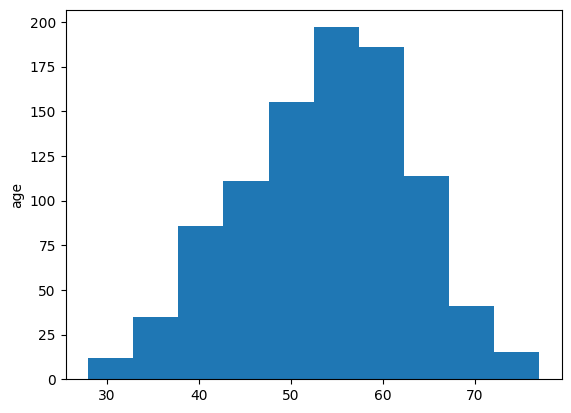

In [19]:
plt.hist(XTRAIN[:, 0])
plt.ylabel('age')
plt.show()

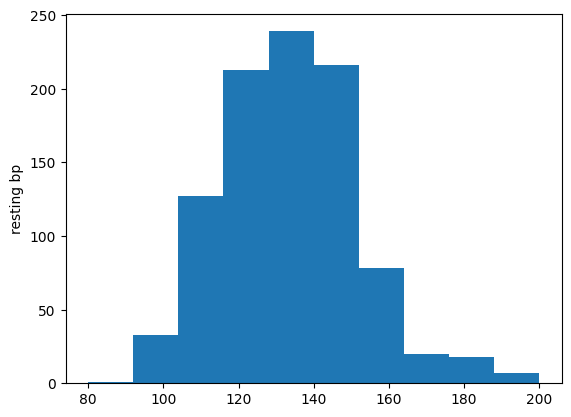

In [20]:
plt.hist(XTRAIN[:, 3])
plt.ylabel('resting bp')
plt.show()

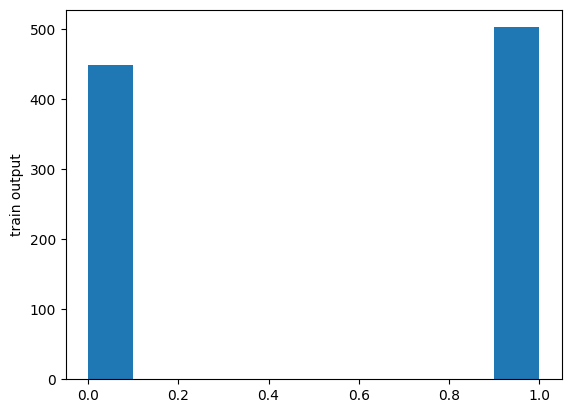

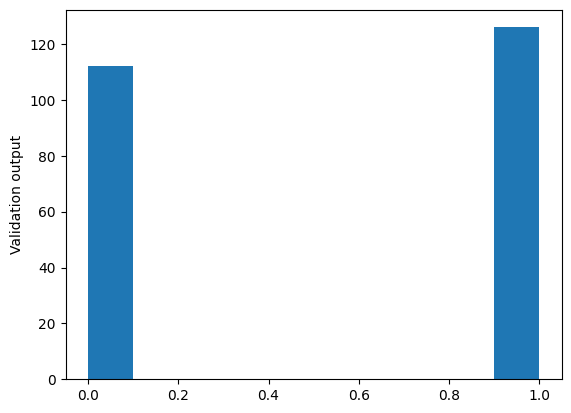

In [21]:
plt.hist(YTRAIN)
plt.ylabel('train output')
plt.show()

plt.hist(YVALID)
plt.ylabel('Validation output')
plt.show()

In [22]:
mean = XTRAIN.mean(axis=0)
std = XTRAIN.std(axis=0)

XTRAIN -= mean
XTRAIN /= std

XVALID -= mean
XVALID /= std

In [23]:
print(mean)
print(std)

[ 53.77  0.77  3.22  132.39  211.24  0.22  0.71  139.99  0.38  0.88  1.62]
[ 9.40  0.42  0.93  18.19  103.05  0.41  0.87  25.58  0.48  1.05  0.61]


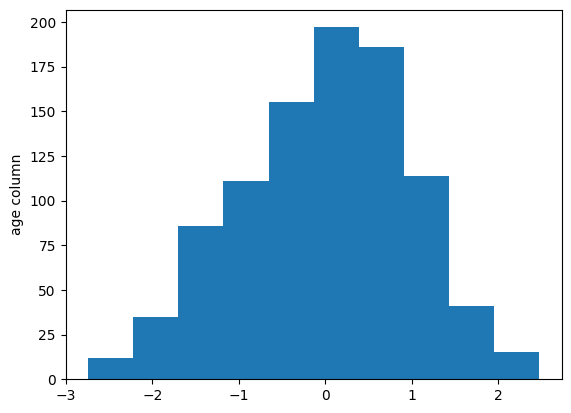

In [24]:
# verify the values are normalize between 0 and 1
plt.hist(XTRAIN[:, 0])
plt.ylabel('age column')
plt.show()

# Phase - 2: Intentional Overfit
- For this phase **do not** split data into training and validation


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [26]:
X = np_data[:, :-1]
Y = np_data[:, -1]

In [27]:
print(X.shape, Y.shape)
print(X.shape[1])

(1190, 11) (1190,)
11


## Overfit with 1 neuron (No overfit ~83% acc)
- 256 epochs

In [28]:
# set up network architecture
model = Sequential(name="overfit_one_neuron")
model.add(Input(shape=(X.shape[1],)))
model.add(Dense(1, activation='sigmoid'))
# compile model
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [29]:
model.fit(X, Y, epochs=256, verbose=1)

Epoch 1/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3249 - loss: 1.0563
Epoch 2/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3585 - loss: 0.9766
Epoch 3/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4110 - loss: 0.9038 
Epoch 4/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4582 - loss: 0.8373 
Epoch 5/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5190 - loss: 0.7752 
Epoch 6/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5544 - loss: 0.7423 
Epoch 7/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5877 - loss: 0.7078
Epoch 8/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6407 - loss: 0.6554
Epoch 9/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6753 - loss: 0.6233
Epoch 10/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7165 - loss: 0.5733 
Epoch 11/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7059 - loss: 0.5886
Epoch 12/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accu

## Overfit with a 2x1 network (No overfit ~85% acc)
- 256 epochs

In [30]:
# add more neurons
overfit_model = Sequential(name="overfit_2x1")
overfit_model.add(Input(shape=(X.shape[1],)))
overfit_model.add(Dense(2, activation='relu'))
overfit_model.add(Dense(1, activation='sigmoid'))

# compile new overfit model
overfit_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [31]:
overfit_model.fit(X,Y, epochs=256, verbose=1)

Epoch 1/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6035 - loss: 0.7269
Epoch 2/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6375 - loss: 0.6677
Epoch 3/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6665 - loss: 0.6484
Epoch 4/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6895 - loss: 0.6081 
Epoch 5/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7205 - loss: 0.5717 
Epoch 6/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7152 - loss: 0.5849
Epoch 7/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7425 - loss: 0.5293
Epoch 8/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7366 - loss: 0.5472 
Epoch 9/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7651 - loss: 0.5105
Epoch 10/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7653 - loss: 0.5154 
Epoch 11/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7748 - loss: 0.4773
Epoch 12/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accur

## Overfit with 8x1 network (No overfit ~90% acc)
- 256 epochs

In [32]:
# add more neurons
overfit_model_2 = Sequential(name="overfit_8x1")
overfit_model_2.add(Input(shape=(X.shape[1],)))
overfit_model_2.add(Dense(8, activation='relu'))
overfit_model_2.add(Dense(1, activation='sigmoid'))

# compile new overfit model
overfit_model_2.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# fit model
overfit_model_2.fit(X,Y, epochs=256, verbose=1)

Epoch 1/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4570 - loss: 0.7927   
Epoch 2/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5483 - loss: 0.6903
Epoch 3/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6896 - loss: 0.6270 
Epoch 4/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7570 - loss: 0.5718
Epoch 5/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7634 - loss: 0.5328
Epoch 6/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7937 - loss: 0.4913
Epoch 7/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8214 - loss: 0.4473
Epoch 8/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8287 - loss: 0.4230 
Epoch 9/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8405 - loss: 0.4041 
Epoch 10/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8255 - loss: 0.3931
Epoch 11/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8390 - loss: 0.3923
Epoch 12/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc

## Overfit 8x4x1 (No overfit ~90% acc)
- 256 epochs

In [33]:
# add more neurons and another layer
overfit_model_3 = Sequential(name="overfit_8x4x1")
overfit_model_3.add(Input(shape=(X.shape[1],)))
overfit_model_3.add(Dense(8, activation='relu'))
overfit_model_3.add(Dense(4, activation='relu'))
overfit_model_3.add(Dense(1, activation='sigmoid'))

# compile new overfit model
overfit_model_3.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# fit model
overfit_model_3.fit(X,Y, epochs=256, verbose=1)

Epoch 1/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4833 - loss: 0.6756
Epoch 2/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6167 - loss: 0.6298
Epoch 3/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7264 - loss: 0.6016
Epoch 4/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7745 - loss: 0.5925
Epoch 5/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7965 - loss: 0.5614
Epoch 6/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8180 - loss: 0.5458
Epoch 7/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7991 - loss: 0.5434
Epoch 8/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8346 - loss: 0.5020
Epoch 9/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8195 - loss: 0.4917
Epoch 10/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8244 - loss: 0.4600
Epoch 11/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8078 - loss: 0.4710
Epoch 12/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

## Overfit 64x4x1 (success)
- 256 epochs

In [34]:
# add more neurons to first layer
overfit_model_4 = Sequential(name="overfit_64x4x1")
overfit_model_4.add(Input(shape=(X.shape[1],)))
overfit_model_4.add(Dense(64, activation='relu'))
overfit_model_4.add(Dense(4, activation='relu'))
overfit_model_4.add(Dense(1, activation='sigmoid'))

# compile new overfit model
overfit_model_4.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

overfit_model_4.fit(X,Y, epochs=256, verbose=1)

Epoch 1/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5514 - loss: 0.6645
Epoch 2/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7890 - loss: 0.5380
Epoch 3/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8170 - loss: 0.4586
Epoch 4/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8471 - loss: 0.3820
Epoch 5/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8482 - loss: 0.3708
Epoch 6/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8506 - loss: 0.3598
Epoch 7/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8566 - loss: 0.3374
Epoch 8/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8667 - loss: 0.3398
Epoch 9/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8558 - loss: 0.3463
Epoch 10/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8716 - loss: 0.3258
Epoch 11/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8630 - loss: 0.3295
Epoch 12/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

## Overfit 64x32x1 (success)
- 100 epochs

In [35]:
# add more neurons
overfit_model_5 = Sequential(name="overfit_64x32x1")
overfit_model_5.add(Input(shape=(X.shape[1],)))
overfit_model_5.add(Dense(64, activation='relu'))
overfit_model_5.add(Dense(32, activation='relu'))
overfit_model_5.add(Dense(1, activation='sigmoid'))

# compile new overfit model
overfit_model_5.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

overfit_model_5.fit(X,Y, epochs=100, verbose=1)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7347 - loss: 0.5696
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8192 - loss: 0.4111
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8375 - loss: 0.3662
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8528 - loss: 0.3301
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8493 - loss: 0.3441
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8474 - loss: 0.3469
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8490 - loss: 0.3438
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8793 - loss: 0.3126
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8573 - loss: 0.3288
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8726 - loss: 0.3050
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8753 - loss: 0.3060
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

## Overfit 500x1 (success)
- 256 epochs

In [36]:
# add more neurons
overfit_model_6 = Sequential(name="overfit_mode_6")
overfit_model_6.add(Input(shape=(X.shape[1],)))
overfit_model_6.add(Dense(500, activation='relu'))
overfit_model_6.add(Dense(1, activation='sigmoid'))

# compile new overfit model
overfit_model_6.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

overfit_model_6.fit(X,Y, epochs=256, verbose=1)

Epoch 1/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7897 - loss: 0.4818
Epoch 2/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8393 - loss: 0.3829
Epoch 3/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8541 - loss: 0.3518
Epoch 4/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8530 - loss: 0.3479
Epoch 5/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8471 - loss: 0.3322
Epoch 6/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8576 - loss: 0.3327
Epoch 7/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8638 - loss: 0.3321
Epoch 8/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8645 - loss: 0.3461
Epoch 9/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8714 - loss: 0.3012
Epoch 10/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8573 - loss: 0.3358
Epoch 11/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8641 - loss: 0.3229
Epoch 12/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

In [37]:
# add more neurons
overfit_model_6 = Sequential(name="overfit_mode_6")
overfit_model_6.add(Input(shape=(X.shape[1],)))
overfit_model_6.add(Dense(8, activation='relu'))
overfit_model_6.add(Dense(8, activation='relu'))
overfit_model_6.add(Dense(8, activation='relu'))
overfit_model_6.add(Dense(8, activation='relu'))
overfit_model_6.add(Dense(8, activation='relu'))
overfit_model_6.add(Dense(1, activation='sigmoid'))

# compile new overfit model
overfit_model_6.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

overfit_model_6.fit(X,Y, epochs=256, verbose=1)

Epoch 1/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6724 - loss: 0.6590
Epoch 2/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7756 - loss: 0.5786
Epoch 3/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7979 - loss: 0.5261
Epoch 4/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8295 - loss: 0.4685
Epoch 5/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8218 - loss: 0.4342
Epoch 6/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8324 - loss: 0.4113
Epoch 7/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8035 - loss: 0.4304
Epoch 8/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8357 - loss: 0.3866
Epoch 9/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8235 - loss: 0.3980
Epoch 10/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8407 - loss: 0.3796
Epoch 11/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8393 - loss: 0.3631
Epoch 12/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

# Phase 3 - Model selection & evaluation
- Goal: obtain highest possible acc on validation set

In [38]:
from tensorflow.keras.metrics import Precision, Recall, F1Score

In [39]:
# double check train and validation sets
print(XTRAIN.shape, YTRAIN.shape)
print(XVALID.shape, YVALID.shape)

(952, 11) (952,)
(238, 11) (238,)


## Create metric classes and model callbacks
- Accuracy, Precision, Recall, F1Score

In [40]:
prec = Precision()
rec = Recall()
f1 = F1Score()

In [106]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
model_checkpoint = ModelCheckpoint(filepath = 'model.keras', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='min')

## Create a neural network logistic regression model
- One output neuron with sigmoid
- val_accuracy: 0.8319
- val_loss: 0.3709
- val_precision: 0.8382
- val_recall: 0.8636

In [42]:
baseline_regression_model = Sequential(name="baseline_regression_model")
baseline_regression_model.add(Input(shape=(X.shape[1],)))
baseline_regression_model.add(Dense(1, activation='sigmoid'))
# compile the model
baseline_regression_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', prec, rec])


In [43]:
history = baseline_regression_model.fit(XTRAIN, YTRAIN, epochs=256, verbose=1, validation_data=(XVALID, YVALID), callbacks=[model_checkpoint, early_stopping])

Epoch 1/256
21/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5943 - loss: 0.6765 - precision: 0.6217 - recall: 0.5956
Epoch 1: val_loss improved from inf to 0.60895, saving model to model.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.6010 - loss: 0.6719 - precision: 0.6270 - recall: 0.6058 - val_accuracy: 0.6555 - val_loss: 0.6089 - val_precision: 0.6642 - val_recall: 0.7063
Epoch 2/256
20/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6657 - loss: 0.6295 - precision: 0.7127 - recall: 0.6478   
Epoch 2: val_loss improved from 0.60895 to 0.58441, saving model to model.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6632 - loss: 0.6285 - precision: 0.7014 - recall: 0.6525 - val_accuracy: 0.6765 - val_loss: 0.5844 - val_precision: 0.6788 - val_recall: 0.7381
Epoch 3/256
22/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6370 - loss: 0.6445 - precision: 0.6266 - recall: 0.6684 
Epoch 3: val_loss improved from 0.58441 to 0.56252, saving model to model.keras

## Model 16x8x1
- val_accuracy: 0.8908
- val_loss: 0.3069
- val_precision: 0.9015
- val_recall: 0.9015

In [118]:
three_layer_model = Sequential(name="16x8x1_model")
three_layer_model.add(Input(shape=(X.shape[1],)))
three_layer_model.add(Dense(16, activation='relu'))
three_layer_model.add(Dense(8, activation='relu'))
three_layer_model.add(Dense(1, activation='sigmoid'))
# compile the model
three_layer_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', prec, rec])

# fit the model
three_layer_history = three_layer_model.fit(XTRAIN, YTRAIN, epochs=256, verbose=1, validation_data=(XVALID, YVALID), callbacks=[model_checkpoint, early_stopping])

Epoch 1/256
 1/30 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.7188 - loss: 0.6859 - precision: 0.8000 - recall: 0.9275
Epoch 1: val_loss did not improve from 0.36341
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6392 - loss: 0.6632 - precision: 0.7005 - recall: 0.8084 - val_accuracy: 0.7101 - val_loss: 0.6009 - val_precision: 0.7111 - val_recall: 0.7619
Epoch 2/256
 1/30 ━━━━━━━━━━━━━━━━━━━━ 4s 155ms/step - accuracy: 0.6875 - loss: 0.7173 - precision: 0.8333 - recall: 0.6818
Epoch 2: val_loss did not improve from 0.36341
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7484 - loss: 0.5700 - precision: 0.7710 - recall: 0.7663 - val_accuracy: 0.7647 - val_loss: 0.5319 - val_precision: 0.7692 - val_recall: 0.7937
Epoch 3/256
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6562 - loss: 0.5957 - precision: 0.7333 - recall: 0.6111
Epoch 3: val_loss did not improve from 0.36341
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7956 - loss: 0.5176 - precision: 0.8160 - 

## Model 8x1
- val_accuracy: 0.8193
- val_loss: 0.3666
- val_precision: 0.8346
- val_recall: 0.8409

In [45]:
eightx1_model = Sequential(name="8x1_model")
eightx1_model.add(Input(shape=(X.shape[1],)))
eightx1_model.add(Dense(8, activation='relu'))
eightx1_model.add(Dense(1, activation='sigmoid'))
# compile the model
eightx1_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', prec, rec])

# fit the model
eightx1_history = eightx1_model.fit(XTRAIN, YTRAIN, epochs=256, verbose=1, validation_data=(XVALID, YVALID), callbacks=[model_checkpoint, early_stopping])

Epoch 1/256
17/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6919 - loss: 0.6364 - precision: 0.8357 - recall: 0.7201
Epoch 1: val_loss did not improve from 0.35383
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.7005 - loss: 0.6270 - precision: 0.8359 - recall: 0.6897 - val_accuracy: 0.7143 - val_loss: 0.5595 - val_precision: 0.8021 - val_recall: 0.6111
Epoch 2/256
 1/30 ━━━━━━━━━━━━━━━━━━━━ 15s 535ms/step - accuracy: 0.5938 - loss: 0.6748 - precision: 0.7333 - recall: 0.5500
Epoch 2: val_loss did not improve from 0.35383
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7498 - loss: 0.5748 - precision: 0.8418 - recall: 0.6475 - val_accuracy: 0.7605 - val_loss: 0.5241 - val_precision: 0.8224 - val_recall: 0.6984
Epoch 3/256
 1/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8438 - loss: 0.4927 - precision: 0.7895 - recall: 0.9375
Epoch 3: val_loss did not improve from 0.35383
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7802 - loss: 0.5300 - precision: 0.8351 -

## Model 4x1
- val_accuracy: 0.8361
- val_loss: 0.4390
- val_precision: 0.8298
- val_recall: 0.8864

In [46]:
fourx1_model = Sequential(name="4x1_model")
fourx1_model.add(Input(shape=(X.shape[1],)))
fourx1_model.add(Dense(4, activation='relu'))
fourx1_model.add(Dense(1, activation='sigmoid'))
# compile the model
fourx1_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', prec, rec])

# fit the model
fourx1_history = fourx1_model.fit(XTRAIN, YTRAIN, epochs=256, verbose=1, validation_data=(XVALID, YVALID), callbacks=[model_checkpoint, early_stopping])

Epoch 1/256
24/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4837 - loss: 0.7734 - precision: 0.7252 - recall: 0.4990
Epoch 1: val_loss did not improve from 0.35383
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.4877 - loss: 0.7730 - precision: 0.7146 - recall: 0.4682 - val_accuracy: 0.5042 - val_loss: 0.7803 - val_precision: 0.5667 - val_recall: 0.2698
Epoch 2/256
 1/30 ━━━━━━━━━━━━━━━━━━━━ 15s 522ms/step - accuracy: 0.6250 - loss: 0.7226 - precision: 0.9000 - recall: 0.4500
Epoch 2: val_loss did not improve from 0.35383
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5843 - loss: 0.7244 - precision: 0.7105 - recall: 0.3697 - val_accuracy: 0.6134 - val_loss: 0.7259 - val_precision: 0.6932 - val_recall: 0.4841
Epoch 3/256
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7500 - loss: 0.6668 - precision: 0.7500 - recall: 0.6429
Epoch 3: val_loss did not improve from 0.35383
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6653 - loss: 0.6936 - precision: 0.7692 -

## Model 2x1
- val_accuracy: 0.8277
- val_loss: 0.4333
- val_precision: 0.8273
- val_recall: 0.8712

In [47]:
twox1_model = Sequential(name="2x1_model")
twox1_model.add(Input(shape=(X.shape[1],)))
twox1_model.add(Dense(2, activation='relu'))
twox1_model.add(Dense(1, activation='sigmoid'))
# compile the model
twox1_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', prec, rec])

# fit the model
twox1_history = twox1_model.fit(XTRAIN, YTRAIN, epochs=256, verbose=1, validation_data=(XVALID, YVALID), callbacks=[model_checkpoint, early_stopping])

Epoch 1/256
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5518 - loss: 0.8840 - precision: 0.7218 - recall: 0.5731
Epoch 1: val_loss did not improve from 0.35383
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.5521 - loss: 0.8835 - precision: 0.7205 - recall: 0.5708 - val_accuracy: 0.5462 - val_loss: 0.9047 - val_precision: 0.6098 - val_recall: 0.3968
Epoch 2/256
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6004 - loss: 0.8100 - precision: 0.6771 - recall: 0.4640 
Epoch 2: val_loss did not improve from 0.35383
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5976 - loss: 0.8103 - precision: 0.6728 - recall: 0.4629 - val_accuracy: 0.5588 - val_loss: 0.8387 - val_precision: 0.6235 - val_recall: 0.4206
Epoch 3/256
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5625 - loss: 0.8196 - precision: 0.8000 - recall: 0.5217
Epoch 3: val_loss did not improve from 0.35383
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6130 - loss: 0.7726 - precision: 0.7097 - r

In [48]:
twox1_history.params

{'verbose': 1, 'epochs': 256, 'steps': 30}

## Plot learning curves

In [49]:
def plot_learning_curves(history, title):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.title(title)
  plt.legend(['training data', 'validation data'], loc='lower right')
  plt.show()

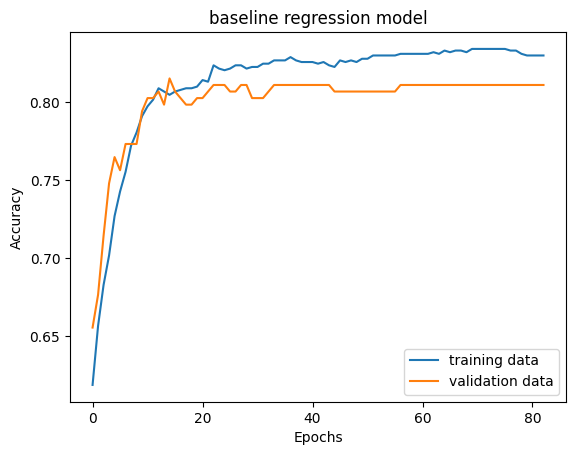

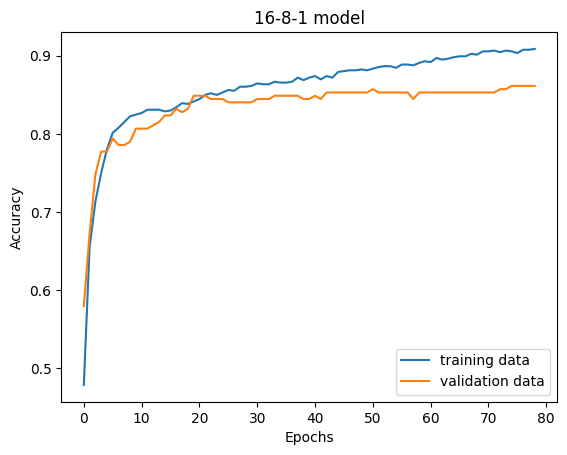

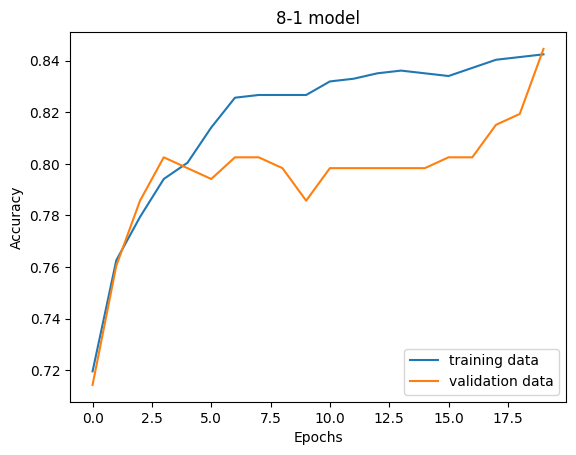

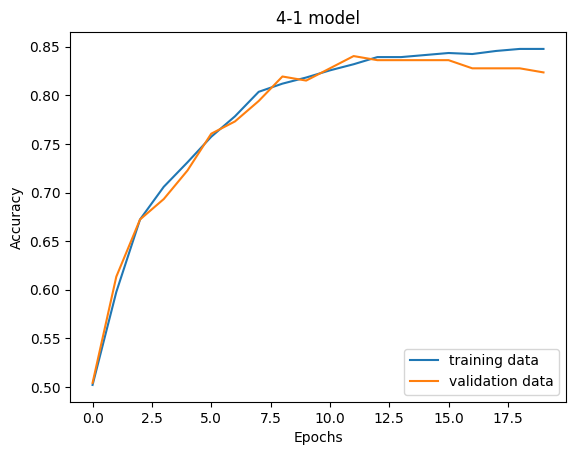

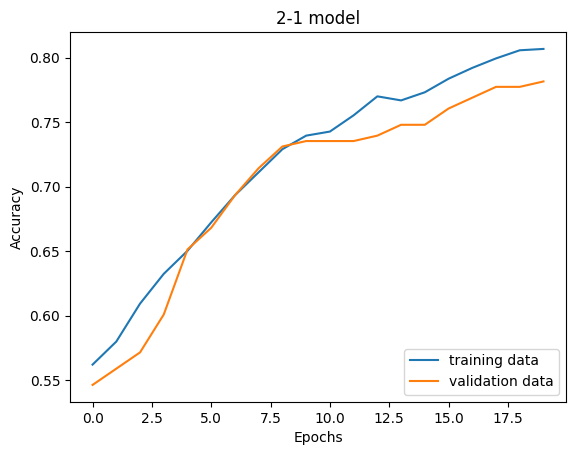

In [50]:
plot_learning_curves(history, "baseline regression model")
plot_learning_curves(three_layer_history, "16-8-1 model")
plot_learning_curves(eightx1_history, "8-1 model")
plot_learning_curves(fourx1_history, "4-1 model")
plot_learning_curves(twox1_history, "2-1 model")

## Plot loss of best model
- 16-8-1

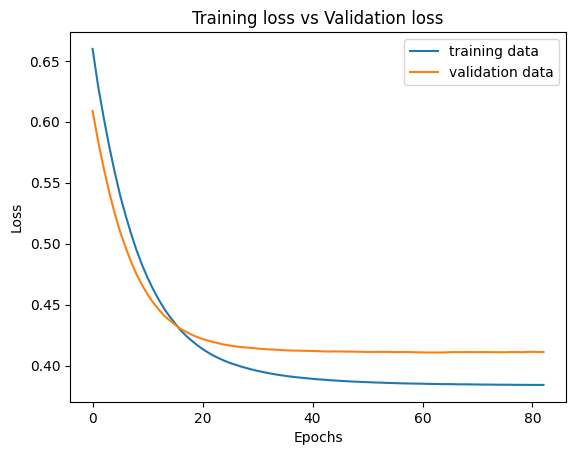

In [51]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training loss vs Validation loss')
plt.legend(['training data', 'validation data'], loc='upper right')
plt.show()

## Load best model from checkpoint file for manual predictions (GRAD student only work)
- Requirement: **build your own function/method that serves as a prediction model**
- Verify predictions are the same

In [113]:
from keras.saving import load_model
best_model = load_model('model.keras')

In [53]:
# double check it is the 16-8-1 model
best_model.name

'16x8x1_model'

In [54]:
# check the summary
best_model.summary()

Model: "16x8x1_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                     │ (None, 16)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 676 (2.64 KB)

 Trainable params: 337 (1.32 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 339 (1.33 KB)

In [55]:
# gives us the shape of the weights (11,16) for the weight kernel and (16,) for the bias
# which makes sense since the layer is 16 neurons and input is 11 features
best_model.layers[0].weights

[<KerasVariable shape=(11, 16), dtype=float32, path=dense_23/kernel>,
 <KerasVariable shape=(16,), dtype=float32, path=dense_23/bias>]

In [56]:
from keras import activations

In [57]:
# Testing cell to see what various methods do
len(best_model.layers[0].get_weights()[0].T)

16

In [58]:
# Taken from Keras docs: output = activation(dot(input, kernel) + bias)
# used in hidden layers
def relu(x):
  return np.maximum(0,x)

# used in output layer
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def my_prediction_function(model, data):
  # this will be mutated between layers and end up as output
  output = data

  # iterate over the layers
  for keras_layer in model.layers:
    # transpose the weights and bias of current layer
    weights = keras_layer.get_weights()[0].T
    bias_list = keras_layer.get_weights()[1].T

    temporary_values = []
    for i in range(len(output)):
      neuron_outputs = [] # list to store neuron outputs
      for j in range(len(weights)):
        pre_activation = np.dot(output[i], weights[j]) + bias_list[j]

        # apply activatoin functions
        if keras_layer.activation == activations.sigmoid:
          activated_output = sigmoid(pre_activation)
        elif keras_layer.activation == activations.relu:
          activated_output = relu(pre_activation)
        else:
          activated_output = pre_activation # just linear without activation

        neuron_outputs.append(activated_output)

      temporary_values.append(neuron_outputs)
    # input for the next layer
    output = np.array(temporary_values)
  return output



## Test the manual prediction function

In [59]:
# manually using the weights and bias from the model to predict
my_prediction_function(best_model, XVALID)[:5]

array([[ 0.64],
       [ 0.90],
       [ 0.80],
       [ 0.17],
       [ 0.02]])

In [60]:
# actual model predictions
predictions = best_model.predict(XVALID)
predictions[:5].T

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[ 0.64,  0.90,  0.80,  0.17,  0.02]], dtype=float32)

In [61]:
# actual values from dataset
true_values = np_data[:, -1]
true_values[:5]

array([ 0.00,  1.00,  0.00,  0.00,  0.00])

In [62]:
XVALID.shape

(238, 11)

# Phase 4 - Feature importance and reduction
- train models where each model only receives one feature at a time

In [69]:
#
print(XTRAIN.shape, YTRAIN.shape)
print(XVALID.shape, YVALID.shape)
print(best_model.name)
print(XTRAIN[:, 1].shape)

(952, 11) (952,)
(238, 11) (238,)
16x8x1_model
(952,)


In [ ]:
#['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol', 'fasting blood sugar',
# 'resting ecg', 'max heart rate', 'exercise angina', 'oldpeak', 'ST slope', 'target']

## model checkpoint callback

In [70]:
model_checkpoint = ModelCheckpoint(filepath = 'feature_model.keras', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=15, verbose=1, mode='min')

## Age model - 16x8x1
- val_accuracy: 0.6471
- val_loss: 0.6520
- val_precision: 0.6567
- val_recall: 0.6984

In [84]:
age_model = Sequential(name="age_model")
age_model.add(Input(shape=(1,)))
age_model.add(Dense(16, activation='relu'))
age_model.add(Dense(8, activation='relu'))
age_model.add(Dense(1, activation='sigmoid'))
# compile the model
age_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', prec, rec])

# fit the model
age_history = age_model.fit(XTRAIN[:, 0], YTRAIN, epochs=100, verbose=1, validation_data=(XVALID[:, 0], YVALID), callbacks=[model_checkpoint, early_stopping])

Epoch 1/100
 1/30 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.6250 - loss: 0.6973 - precision: 0.7410 - recall: 0.8425
Epoch 1: val_loss did not improve from 0.53796
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5561 - loss: 0.6900 - precision: 0.6110 - recall: 0.9185 - val_accuracy: 0.6471 - val_loss: 0.6754 - val_precision: 0.6567 - val_recall: 0.6984
Epoch 2/100
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6562 - loss: 0.6642 - precision: 0.6471 - recall: 0.6875
Epoch 2: val_loss did not improve from 0.53796
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6217 - loss: 0.6727 - precision: 0.6244 - recall: 0.6766 - val_accuracy: 0.6471 - val_loss: 0.6652 - val_precision: 0.6567 - val_recall: 0.6984
Epoch 3/100
 1/30 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.5625 - loss: 0.6715 - precision: 0.5000 - recall: 0.7143
Epoch 3: val_loss did not improve from 0.53796
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6254 - loss: 0.6628 - precision: 0.6242 - r

## Sex
- val_accuracy: 0.6849
- val_loss: 0.6165
- val_precision: 0.6441
- val_recall: 0.9048

In [73]:
sex_model = Sequential(name="sex_model")
sex_model.add(Input(shape=(1,)))
sex_model.add(Dense(16, activation='relu'))
sex_model.add(Dense(8, activation='relu'))
sex_model.add(Dense(1, activation='sigmoid'))
# compile the model
sex_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', prec, rec])

# fit the model
sex_history = sex_model.fit(XTRAIN[:, 1], YTRAIN, epochs=100, verbose=1, validation_data=(XVALID[:, 1], YVALID), callbacks=[model_checkpoint, early_stopping])

Epoch 1/100
 1/30 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.2812 - loss: 0.7247 - precision: 0.7397 - recall: 0.7448
Epoch 1: val_loss improved from inf to 0.68212, saving model to feature_model.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.4322 - loss: 0.7045 - precision: 0.7397 - recall: 0.3200 - val_accuracy: 0.4706 - val_loss: 0.6821 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5312 - loss: 0.6756 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 2: val_loss improved from 0.68212 to 0.66605, saving model to feature_model.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4761 - loss: 0.6814 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.4706 - val_loss: 0.6660 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/100
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5625 - loss: 0.6602 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 3: val_loss improve

## Chest pain type
- val_accuracy: 0.7605
- val_loss: 0.5380
- val_precision: 0.7556
- val_recall: 0.8095

In [74]:
chest_model = Sequential(name="chest_model")
chest_model.add(Input(shape=(1,)))
chest_model.add(Dense(16, activation='relu'))
chest_model.add(Dense(8, activation='relu'))
chest_model.add(Dense(1, activation='sigmoid'))
# compile the model
chest_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', prec, rec])

# fit the model
chest_history = chest_model.fit(XTRAIN[:, 2], YTRAIN, epochs=100, verbose=1, validation_data=(XVALID[:, 2], YVALID), callbacks=[model_checkpoint, early_stopping])

Epoch 1/100
 1/30 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.2188 - loss: 0.7417 - precision: 0.6126 - recall: 0.8182
Epoch 1: val_loss did not improve from 0.61626
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.3674 - loss: 0.7166 - precision: 0.5162 - recall: 0.3838 - val_accuracy: 0.4706 - val_loss: 0.6793 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
 1/30 ━━━━━━━━━━━━━━━━━━━━ 4s 158ms/step - accuracy: 0.5312 - loss: 0.6724 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 2: val_loss did not improve from 0.61626
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6006 - loss: 0.6681 - precision: 0.5801 - recall: 0.3232 - val_accuracy: 0.7605 - val_loss: 0.6512 - val_precision: 0.7556 - val_recall: 0.8095
Epoch 3/100
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7188 - loss: 0.6837 - precision: 0.8333 - recall: 0.5882
Epoch 3: val_loss did not improve from 0.61626
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7608 - loss: 0.6419 - prec

## Resting bp
- val_accuracy: 0.5882
- val_loss: 0.6704
- val_precision: 0.6400
- val_recall: 0.5079

In [75]:
bp_model = Sequential(name="bp_model")
bp_model.add(Input(shape=(1,)))
bp_model.add(Dense(16, activation='relu'))
bp_model.add(Dense(8, activation='relu'))
bp_model.add(Dense(1, activation='sigmoid'))
# compile the model
bp_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', prec, rec])

# fit the model
bp_history = bp_model.fit(XTRAIN[:, 3], YTRAIN, epochs=100, verbose=1, validation_data=(XVALID[:, 3], YVALID), callbacks=[model_checkpoint, early_stopping])

Epoch 1/100
 1/30 ━━━━━━━━━━━━━━━━━━━━ 1:16 3s/step - accuracy: 0.5625 - loss: 0.6783 - precision: 0.7186 - recall: 0.8333
Epoch 1: val_loss did not improve from 0.53796
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5236 - loss: 0.6917 - precision: 0.5885 - recall: 0.8737 - val_accuracy: 0.5588 - val_loss: 0.6809 - val_precision: 0.5538 - val_recall: 0.8571
Epoch 2/100
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6250 - loss: 0.6723 - precision: 0.6429 - recall: 0.9000
Epoch 2: val_loss did not improve from 0.53796
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5490 - loss: 0.6832 - precision: 0.5530 - recall: 0.8605 - val_accuracy: 0.5504 - val_loss: 0.6774 - val_precision: 0.5525 - val_recall: 0.7937
Epoch 3/100
 1/30 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.5000 - loss: 0.7123 - precision: 0.5000 - recall: 0.8750
Epoch 3: val_loss did not improve from 0.53796
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5211 - loss: 0.6909 - precision: 0.5215 - 

## Cholesterol
- val_accuracy: 0.5798
- val_loss: 0.6686
- val_precision: 0.6806
- val_recall: 0.3889

In [76]:
ch_model = Sequential(name="ch_model")
ch_model.add(Input(shape=(1,)))
ch_model.add(Dense(16, activation='relu'))
ch_model.add(Dense(8, activation='relu'))
ch_model.add(Dense(1, activation='sigmoid'))
# compile the model
ch_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', prec, rec])

# fit the model
ch_history = ch_model.fit(XTRAIN[:, 4], YTRAIN, epochs=100, verbose=1, validation_data=(XVALID[:, 4], YVALID), callbacks=[model_checkpoint, early_stopping])

Epoch 1/100
 1/30 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.5312 - loss: 0.6819 - precision: 0.6136 - recall: 0.5664
Epoch 1: val_loss did not improve from 0.53796
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5598 - loss: 0.6844 - precision: 0.5712 - recall: 0.7577 - val_accuracy: 0.5630 - val_loss: 0.6792 - val_precision: 0.5640 - val_recall: 0.7698
Epoch 2/100
 1/30 ━━━━━━━━━━━━━━━━━━━━ 4s 157ms/step - accuracy: 0.7188 - loss: 0.6300 - precision: 0.7727 - recall: 0.8095
Epoch 2: val_loss did not improve from 0.53796
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6022 - loss: 0.6676 - precision: 0.5964 - recall: 0.8036 - val_accuracy: 0.5714 - val_loss: 0.6743 - val_precision: 0.5769 - val_recall: 0.7143
Epoch 3/100
 1/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.6250 - loss: 0.6637 - precision: 0.5652 - recall: 0.8667
Epoch 3: val_loss did not improve from 0.53796
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6171 - loss: 0.6649 - precision: 0.5986 - 

## Fasting blood sugar
- val_accuracy: 0.5924
- val_loss: 0.6534
- val_precision: 0.8222
- val_recall: 0.2937

In [77]:
bs_model = Sequential(name="bs_model")
bs_model.add(Input(shape=(1,)))
bs_model.add(Dense(16, activation='relu'))
bs_model.add(Dense(8, activation='relu'))
bs_model.add(Dense(1, activation='sigmoid'))
# compile the model
bs_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', prec, rec])

# fit the model
bs_history = bs_model.fit(XTRAIN[:, 5], YTRAIN, epochs=100, verbose=1, validation_data=(XVALID[:, 5], YVALID), callbacks=[model_checkpoint, early_stopping])

Epoch 1/100
18/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5352 - loss: 0.6852 - precision: 0.6779 - recall: 0.3161
Epoch 1: val_loss did not improve from 0.53796
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.5497 - loss: 0.6799 - precision: 0.6891 - recall: 0.3161 - val_accuracy: 0.5924 - val_loss: 0.6556 - val_precision: 0.8222 - val_recall: 0.2937
Epoch 2/100
29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6009 - loss: 0.6661 - precision: 0.7383 - recall: 0.3175
Epoch 2: val_loss did not improve from 0.53796
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5988 - loss: 0.6664 - precision: 0.7370 - recall: 0.3163 - val_accuracy: 0.5924 - val_loss: 0.6552 - val_precision: 0.8222 - val_recall: 0.2937
Epoch 3/100
19/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5767 - loss: 0.6626 - precision: 0.7429 - recall: 0.3431  
Epoch 3: val_loss did not improve from 0.53796
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5711 - loss: 0.6665 - precision: 0.7308 - r

## resting ecg
- val_accuracy: 0.5672
- val_loss: 0.6859
- val_precision: 0.6211
- val_recall: 0.4683

In [78]:
ecg_model = Sequential(name="ecg_model")
ecg_model.add(Input(shape=(1,)))
ecg_model.add(Dense(16, activation='relu'))
ecg_model.add(Dense(8, activation='relu'))
ecg_model.add(Dense(1, activation='sigmoid'))
# compile the model
ecg_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', prec, rec])

# fit the model
ecg_history = ecg_model.fit(XTRAIN[:, 6], YTRAIN, epochs=100, verbose=1, validation_data=(XVALID[:, 6], YVALID), callbacks=[model_checkpoint, early_stopping])

Epoch 1/100
 1/30 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.3438 - loss: 0.7092 - precision: 0.8222 - recall: 0.2517
Epoch 1: val_loss did not improve from 0.53796
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.4613 - loss: 0.6974 - precision: 0.7614 - recall: 0.1237 - val_accuracy: 0.4916 - val_loss: 0.6955 - val_precision: 0.5714 - val_recall: 0.1587
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5410 - loss: 0.6931 - precision: 0.6960 - recall: 0.2240  
Epoch 2: val_loss did not improve from 0.53796
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5406 - loss: 0.6931 - precision: 0.6954 - recall: 0.2231 - val_accuracy: 0.4916 - val_loss: 0.6936 - val_precision: 0.5714 - val_recall: 0.1587
Epoch 3/100
18/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5467 - loss: 0.6919 - precision: 0.7386 - recall: 0.1821 
Epoch 3: val_loss did not improve from 0.53796
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5411 - loss: 0.6922 - precision: 0.7085 - 

## max heart rate
- val_accuracy: 0.6345
- val_loss: 0.6337
- val_precision: 0.6696
- val_recall: 0.6111

In [79]:
heart_model = Sequential(name="heart_model")
heart_model.add(Input(shape=(1,)))
heart_model.add(Dense(16, activation='relu'))
heart_model.add(Dense(8, activation='relu'))
heart_model.add(Dense(1, activation='sigmoid'))
# compile the model
heart_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', prec, rec])

# fit the model
heart_history = heart_model.fit(XTRAIN[:, 7], YTRAIN, epochs=100, verbose=1, validation_data=(XVALID[:, 7], YVALID), callbacks=[model_checkpoint, early_stopping])

Epoch 1/100
28/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5357 - loss: 0.7419 - precision: 0.5542 - recall: 0.7454
Epoch 1: val_loss did not improve from 0.53796
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5349 - loss: 0.7396 - precision: 0.5529 - recall: 0.7503 - val_accuracy: 0.4832 - val_loss: 0.6872 - val_precision: 0.5090 - val_recall: 0.6746
Epoch 2/100
 1/30 ━━━━━━━━━━━━━━━━━━━━ 4s 164ms/step - accuracy: 0.5625 - loss: 0.6916 - precision: 0.4545 - recall: 0.8333
Epoch 2: val_loss did not improve from 0.53796
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5845 - loss: 0.6701 - precision: 0.5823 - recall: 0.6772 - val_accuracy: 0.6261 - val_loss: 0.6555 - val_precision: 0.6762 - val_recall: 0.5635
Epoch 3/100
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5000 - loss: 0.6994 - precision: 0.5556 - recall: 0.5556
Epoch 3: val_loss did not improve from 0.53796
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6675 - loss: 0.6439 - precision: 0.7092 - 

## exercise angina
- val_accuracy: 0.7479
- val_loss: 0.5573
- val_precision: 0.8173
- val_recall: 0.6746

In [80]:
ang_model = Sequential(name="ang_model")
ang_model.add(Input(shape=(1,)))
ang_model.add(Dense(16, activation='relu'))
ang_model.add(Dense(8, activation='relu'))
ang_model.add(Dense(1, activation='sigmoid'))
# compile the model
ang_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', prec, rec])

# fit the model
ang_history = ang_model.fit(XTRAIN[:, 8], YTRAIN, epochs=100, verbose=1, validation_data=(XVALID[:, 8], YVALID), callbacks=[model_checkpoint, early_stopping])

Epoch 1/100
 1/30 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.4375 - loss: 0.7523 - precision: 0.6696 - recall: 0.5347
Epoch 1: val_loss did not improve from 0.53796
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5247 - loss: 0.7058 - precision: 0.7153 - recall: 0.3380 - val_accuracy: 0.7479 - val_loss: 0.6343 - val_precision: 0.8173 - val_recall: 0.6746
Epoch 2/100
29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7050 - loss: 0.6356 - precision: 0.8366 - recall: 0.5696 
Epoch 2: val_loss did not improve from 0.53796
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7061 - loss: 0.6347 - precision: 0.8365 - recall: 0.5711 - val_accuracy: 0.7479 - val_loss: 0.5950 - val_precision: 0.8173 - val_recall: 0.6746
Epoch 3/100
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6562 - loss: 0.6485 - precision: 0.6667 - recall: 0.5333
Epoch 3: val_loss did not improve from 0.53796
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7083 - loss: 0.6056 - precision: 0.8332 - r

## oldpeak
- val_accuracy: 0.7437
- val_loss: 0.5588
- val_precision: 0.7519
- val_recall: 0.7698

In [81]:
peak_model = Sequential(name="peak_model")
peak_model.add(Input(shape=(1,)))
peak_model.add(Dense(16, activation='relu'))
peak_model.add(Dense(8, activation='relu'))
peak_model.add(Dense(1, activation='sigmoid'))
# compile the model
peak_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', prec, rec])

# fit the model
peak_history = peak_model.fit(XTRAIN[:, 9], YTRAIN, epochs=100, verbose=1, validation_data=(XVALID[:, 9], YVALID), callbacks=[model_checkpoint, early_stopping])

Epoch 1/100
 1/30 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.3750 - loss: 0.6881 - precision: 0.8173 - recall: 0.5822
Epoch 1: val_loss did not improve from 0.53796
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6450 - loss: 0.6677 - precision: 0.7598 - recall: 0.6046 - val_accuracy: 0.7437 - val_loss: 0.6140 - val_precision: 0.7642 - val_recall: 0.7460
Epoch 2/100
 1/30 ━━━━━━━━━━━━━━━━━━━━ 5s 173ms/step - accuracy: 0.7500 - loss: 0.6128 - precision: 0.8462 - recall: 0.6471
Epoch 2: val_loss did not improve from 0.53796
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7007 - loss: 0.6323 - precision: 0.7531 - recall: 0.6393 - val_accuracy: 0.7437 - val_loss: 0.5897 - val_precision: 0.7519 - val_recall: 0.7698
Epoch 3/100
 1/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.5625 - loss: 0.6947 - precision: 0.7500 - recall: 0.5455
Epoch 3: val_loss did not improve from 0.53796
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6953 - loss: 0.6172 - precision: 0.7468 - 

## ST slope
- val_accuracy: 0.7731
- val_loss: 0.5739
- val_precision: 0.7687
- val_recall: 0.8175

In [82]:
slop_model = Sequential(name="slop_model")
slop_model.add(Input(shape=(1,)))
slop_model.add(Dense(16, activation='relu'))
slop_model.add(Dense(8, activation='relu'))
slop_model.add(Dense(1, activation='sigmoid'))
# compile the model
slop_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', prec, rec])

# fit the model
slop_history = slop_model.fit(XTRAIN[:, 10], YTRAIN, epochs=100, verbose=1, validation_data=(XVALID[:, 10], YVALID), callbacks=[model_checkpoint, early_stopping])

Epoch 1/100
 1/30 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.3438 - loss: 0.7105 - precision: 0.7519 - recall: 0.6599
Epoch 1: val_loss did not improve from 0.53796
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5189 - loss: 0.6737 - precision: 0.7639 - recall: 0.3786 - val_accuracy: 0.7227 - val_loss: 0.6424 - val_precision: 0.7586 - val_recall: 0.6984
Epoch 2/100
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8750 - loss: 0.6271 - precision: 0.8500 - recall: 0.9444
Epoch 2: val_loss did not improve from 0.53796
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7840 - loss: 0.6380 - precision: 0.7994 - recall: 0.8114 - val_accuracy: 0.7731 - val_loss: 0.6209 - val_precision: 0.7687 - val_recall: 0.8175
Epoch 3/100
 1/30 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.7188 - loss: 0.6197 - precision: 0.6667 - recall: 0.8000
Epoch 3: val_loss did not improve from 0.53796
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7760 - loss: 0.6202 - precision: 0.7766 - r

## Plot feature importance

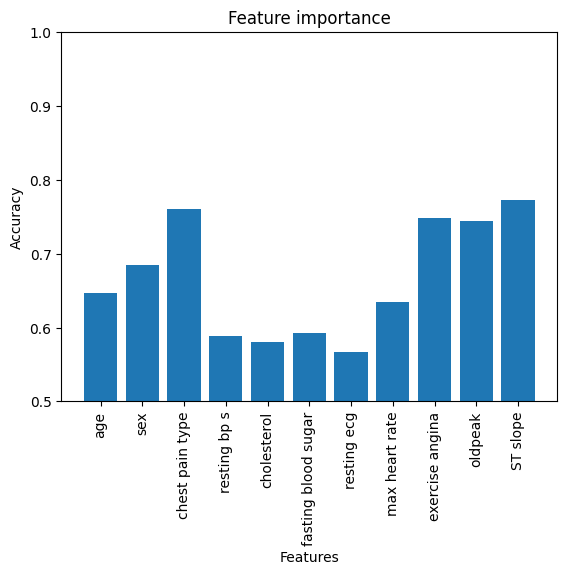

In [98]:
sl = slop_history.history['val_accuracy'][-1]
pk = peak_history.history['val_accuracy'][-1]
age = age_history.history['val_accuracy'][-1]
sex = sex_history.history['val_accuracy'][-1]
ecg = ecg_history.history['val_accuracy'][-1]
ang = ang_history.history['val_accuracy'][-1]
chest = chest_history.history['val_accuracy'][-1]
bp = bp_history.history['val_accuracy'][-1]
ch = ch_history.history['val_accuracy'][-1]
bs = bs_history.history['val_accuracy'][-1]
heart = heart_history.history['val_accuracy'][-1]
def plot_feature_importance():
  cols = ['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol', 'fasting blood sugar','resting ecg', 'max heart rate', 'exercise angina', 'oldpeak', 'ST slope']
  vals = [age, sex, chest, bp, ch, bs, ecg, heart, ang, pk, sl]
  plt.bar(cols, vals)
  plt.ylabel('Accuracy')
  plt.ylim(.5, 1)
  plt.xlabel('Features')
  plt.title('Feature importance')
  plt.xticks(rotation=90)
  plt.show()

plot_feature_importance()

In [ ]:
#['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol', 'fasting blood sugar',
# 'resting ecg', 'max heart rate', 'exercise angina', 'oldpeak', 'ST slope', 'target']


## Remove resting ecg
- val_accuracy: 0.8235
- val_loss: 0.3971
- val_precision: 0.8043
- val_recall: 0.8810

In [100]:
ETRAIN = np.delete(XTRAIN, 6, axis=1 )
EVALID = np.delete(XVALID, 6, axis=1 )
less_ecg_model = Sequential(name="less_ecg_model")
less_ecg_model.add(Input(shape=(10,)))
less_ecg_model.add(Dense(16, activation='relu'))
less_ecg_model.add(Dense(8, activation='relu'))
less_ecg_model.add(Dense(1, activation='sigmoid'))
# compile the model
less_ecg_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', prec, rec])

# fit the model
less_ecg_history = less_ecg_model.fit(ETRAIN, YTRAIN, epochs=100, verbose=1, validation_data=(EVALID, YVALID), callbacks=[model_checkpoint, early_stopping])

Epoch 1/100
25/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5289 - loss: 0.6815 - precision: 0.6879 - recall: 0.3832
Epoch 1: val_loss did not improve from 0.53796
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5384 - loss: 0.6790 - precision: 0.6992 - recall: 0.3760 - val_accuracy: 0.7227 - val_loss: 0.6094 - val_precision: 0.8409 - val_recall: 0.5873
Epoch 2/100
 1/30 ━━━━━━━━━━━━━━━━━━━━ 4s 146ms/step - accuracy: 0.7188 - loss: 0.5702 - precision: 0.6364 - recall: 0.5833
Epoch 2: val_loss improved from 0.53796 to 0.53546, saving model to feature_model.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7290 - loss: 0.5818 - precision: 0.8648 - recall: 0.5668 - val_accuracy: 0.7731 - val_loss: 0.5355 - val_precision: 0.8333 - val_recall: 0.7143
Epoch 3/100
 1/30 ━━━━━━━━━━━━━━━━━━━━ 5s 178ms/step - accuracy: 0.7500 - loss: 0.5283 - precision: 0.6000 - recall: 0.6000
Epoch 3: val_loss improved from 0.53546 to 0.49038, saving model to feature_model.keras
30/30 ━━━━━━

## Remove fasting blood sugar
- val_accuracy: 0.8067
- val_loss: 0.4022
- val_precision: 0.7941
- val_recall: 0.8571

In [102]:
FTRAIN = np.delete(ETRAIN, 5, axis=1 )
FVALID = np.delete(EVALID, 5, axis=1 )
less_fasting_model = Sequential(name="less_fasting_model")
less_fasting_model.add(Input(shape=(9,)))
less_fasting_model.add(Dense(16, activation='relu'))
less_fasting_model.add(Dense(8, activation='relu'))
less_fasting_model.add(Dense(1, activation='sigmoid'))
# compile the model
less_fasting_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', prec, rec])

# fit the model
less_fasting_history = less_fasting_model.fit(FTRAIN, YTRAIN, epochs=100, verbose=1, validation_data=(FVALID, YVALID), callbacks=[model_checkpoint, early_stopping])

Epoch 1/100
 1/30 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.6875 - loss: 0.6076 - precision: 0.7852 - recall: 0.8540
Epoch 1: val_loss did not improve from 0.39488
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7423 - loss: 0.5963 - precision: 0.7885 - recall: 0.7845 - val_accuracy: 0.7857 - val_loss: 0.5409 - val_precision: 0.8000 - val_recall: 0.7937
Epoch 2/100
20/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8333 - loss: 0.5336 - precision: 0.8564 - recall: 0.8490 
Epoch 2: val_loss did not improve from 0.39488
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8273 - loss: 0.5268 - precision: 0.8437 - recall: 0.8456 - val_accuracy: 0.8067 - val_loss: 0.4862 - val_precision: 0.7985 - val_recall: 0.8492
Epoch 3/100
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8466 - loss: 0.4569 - precision: 0.8537 - recall: 0.8619
Epoch 3: val_loss did not improve from 0.39488
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8443 - loss: 0.4571 - precision: 0.8501 - r

## Remove Cholesterol
- val_accuracy: 0.8445
- val_loss: 0.3999
- val_precision: 0.8296
- val_recall: 0.8889

In [103]:
CTRAIN = np.delete(FTRAIN, 4, axis=1 )
CVALID = np.delete(FVALID, 4, axis=1 )
less_ch_model = Sequential(name="less_ch_model")
less_ch_model.add(Input(shape=(8,)))
less_ch_model.add(Dense(16, activation='relu'))
less_ch_model.add(Dense(8, activation='relu'))
less_ch_model.add(Dense(1, activation='sigmoid'))
# compile the model
less_ch_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', prec, rec])

# fit the model
less_ch_history = less_ch_model.fit(CTRAIN, YTRAIN, epochs=100, verbose=1, validation_data=(CVALID, YVALID), callbacks=[model_checkpoint, early_stopping])


Epoch 1/100
 1/30 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.5312 - loss: 0.8146 - precision: 0.7410 - recall: 0.8723
Epoch 1: val_loss did not improve from 0.39488
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6396 - loss: 0.6582 - precision: 0.6726 - recall: 0.8876 - val_accuracy: 0.7185 - val_loss: 0.5671 - val_precision: 0.6705 - val_recall: 0.9206
Epoch 2/100
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7500 - loss: 0.6637 - precision: 0.6842 - recall: 0.8667
Epoch 2: val_loss did not improve from 0.39488
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7392 - loss: 0.5663 - precision: 0.7125 - recall: 0.8479 - val_accuracy: 0.7983 - val_loss: 0.5131 - val_precision: 0.7600 - val_recall: 0.9048
Epoch 3/100
 1/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.7812 - loss: 0.4874 - precision: 0.8095 - recall: 0.8500
Epoch 3: val_loss did not improve from 0.39488
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7690 - loss: 0.5217 - precision: 0.7557 - r

## Remove resting bp
- val_accuracy: 0.8151
- val_loss: 0.4053
- val_precision: 0.7887
- val_recall: 0.8889

In [104]:
RTRAIN = np.delete(CTRAIN, 3, axis=1 )
RVALID = np.delete(CVALID, 3, axis=1 )
less_resting_model = Sequential(name="less_resting_model")
less_resting_model.add(Input(shape=(7,)))
less_resting_model.add(Dense(16, activation='relu'))
less_resting_model.add(Dense(8, activation='relu'))
less_resting_model.add(Dense(1, activation='sigmoid'))
# compile the model
less_resting_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', prec, rec])

# fit the model
less_resting_history = less_resting_model.fit(RTRAIN, YTRAIN, epochs=100, verbose=1, validation_data=(RVALID, YVALID), callbacks=[model_checkpoint, early_stopping])


Epoch 1/100
 1/30 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.3750 - loss: 0.7930 - precision: 0.7800 - recall: 0.8298
Epoch 1: val_loss did not improve from 0.39488
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.4678 - loss: 0.7351 - precision: 0.6518 - recall: 0.5965 - val_accuracy: 0.5588 - val_loss: 0.6735 - val_precision: 0.6364 - val_recall: 0.3889
Epoch 2/100
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6875 - loss: 0.6254 - precision: 0.8333 - recall: 0.5556
Epoch 2: val_loss did not improve from 0.39488
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6678 - loss: 0.6406 - precision: 0.7608 - recall: 0.5708 - val_accuracy: 0.6597 - val_loss: 0.6014 - val_precision: 0.7368 - val_recall: 0.5556
Epoch 3/100
25/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7264 - loss: 0.5799 - precision: 0.7972 - recall: 0.6066 
Epoch 3: val_loss did not improve from 0.39488
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7313 - loss: 0.5781 - precision: 0.8011 - r

## Removing chest pain
- val_accuracy: 0.8361
- val_loss: 0.4152
- val_precision: 0.8129
- val_recall: 0.8968

In [122]:
CTTRAIN = np.delete(RTRAIN, 2, axis=1 )
CTVALID = np.delete(RVALID, 2, axis=1 )
less_chest_model = Sequential(name="less_chest_model")
less_chest_model.add(Input(shape=(6,)))
less_chest_model.add(Dense(16, activation='relu'))
less_chest_model.add(Dense(8, activation='relu'))
less_chest_model.add(Dense(1, activation='sigmoid'))
# compile the model
less_chest_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', prec, rec])

# fit the model
less_chest_history = less_chest_model.fit(CTTRAIN, YTRAIN, epochs=100, verbose=1, validation_data=(CTVALID, YVALID), callbacks=[model_checkpoint, early_stopping])

Epoch 1/100
18/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4973 - loss: 0.7194 - precision: 0.6303 - recall: 0.9512
Epoch 1: val_loss did not improve from 0.33900
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.5177 - loss: 0.7090 - precision: 0.6115 - recall: 0.9555 - val_accuracy: 0.5924 - val_loss: 0.6595 - val_precision: 0.5681 - val_recall: 0.9603
Epoch 2/100
 1/30 ━━━━━━━━━━━━━━━━━━━━ 16s 568ms/step - accuracy: 0.7812 - loss: 0.6300 - precision: 0.7826 - recall: 0.9000
Epoch 2: val_loss did not improve from 0.33900
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6689 - loss: 0.6551 - precision: 0.6353 - recall: 0.9118 - val_accuracy: 0.7353 - val_loss: 0.6219 - val_precision: 0.6821 - val_recall: 0.9365
Epoch 3/100
 1/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8125 - loss: 0.6233 - precision: 0.7895 - recall: 0.8824
Epoch 3: val_loss did not improve from 0.33900
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7477 - loss: 0.6218 - precision: 0.7097 -

## Remove slope
- val_accuracy: 0.8025
- val_loss: 0.4664
- val_precision: 0.8015
- val_recall: 0.8333

In [124]:
STRAIN = np.delete(CTTRAIN, 5, axis=1 )
SVALID = np.delete(CTVALID, 5, axis=1 )
less_slope_model = Sequential(name="less_slope_model")
less_slope_model.add(Input(shape=(5,)))
less_slope_model.add(Dense(16, activation='relu'))
less_slope_model.add(Dense(8, activation='relu'))
less_slope_model.add(Dense(1, activation='sigmoid'))
# compile the model
less_slope_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', prec, rec])

# fit the model
less_slope_history = less_slope_model.fit(STRAIN, YTRAIN, epochs=100, verbose=1, validation_data=(SVALID, YVALID), callbacks=[model_checkpoint, early_stopping])

Epoch 1/100
 1/30 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.1875 - loss: 0.8294 - precision: 0.7312 - recall: 0.8417
Epoch 1: val_loss did not improve from 0.33900
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.2768 - loss: 0.8058 - precision: 0.5039 - recall: 0.5201 - val_accuracy: 0.4076 - val_loss: 0.7230 - val_precision: 0.4157 - val_recall: 0.2937
Epoch 2/100
 1/30 ━━━━━━━━━━━━━━━━━━━━ 5s 184ms/step - accuracy: 0.5000 - loss: 0.7159 - precision: 0.6000 - recall: 0.4737
Epoch 2: val_loss did not improve from 0.33900
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5087 - loss: 0.7013 - precision: 0.5452 - recall: 0.4164 - val_accuracy: 0.7185 - val_loss: 0.6475 - val_precision: 0.8041 - val_recall: 0.6190
Epoch 3/100
 1/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6562 - loss: 0.6596 - precision: 0.6667 - recall: 0.5333
Epoch 3: val_loss did not improve from 0.33900
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6869 - loss: 0.6390 - precision: 0.7960 - 

## Remove Old peak
- val_accuracy: 0.7311
- val_loss: 0.5201
- val_precision: 0.7627
- val_recall: 0.7143

In [128]:
OTRAIN = np.delete(STRAIN, 4, axis=1 )
OVALID = np.delete(SVALID, 4, axis=1 )
less_old_model = Sequential(name="less_old_model")
less_old_model.add(Input(shape=(4,)))
less_old_model.add(Dense(16, activation='relu'))
less_old_model.add(Dense(8, activation='relu'))
less_old_model.add(Dense(1, activation='sigmoid'))
# compile the model
less_old_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', prec, rec])

# fit the model
less_old_history = less_old_model.fit(OTRAIN, YTRAIN, epochs=100, verbose=1, validation_data=(OVALID, YVALID), callbacks=[model_checkpoint, early_stopping])

Epoch 1/100
 1/30 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.6562 - loss: 0.6348 - precision: 0.7792 - recall: 0.8333
Epoch 1: val_loss did not improve from 0.33900
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6750 - loss: 0.6183 - precision: 0.7195 - recall: 0.7830 - val_accuracy: 0.7479 - val_loss: 0.5685 - val_precision: 0.7578 - val_recall: 0.7698
Epoch 2/100
20/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7447 - loss: 0.5678 - precision: 0.7673 - recall: 0.7249  
Epoch 2: val_loss did not improve from 0.33900
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7480 - loss: 0.5636 - precision: 0.7777 - recall: 0.7258 - val_accuracy: 0.7353 - val_loss: 0.5368 - val_precision: 0.7692 - val_recall: 0.7143
Epoch 3/100
27/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7633 - loss: 0.5239 - precision: 0.8268 - recall: 0.7083
Epoch 3: val_loss did not improve from 0.33900
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7637 - loss: 0.5235 - precision: 0.8255 - r

## Remove Exercise Angina
- val_accuracy: 0.7185
- val_loss: 0.5657
- val_precision: 0.7398
- val_recall: 0.7222

In [131]:
ATRAIN = np.delete(OTRAIN, 3, axis=1 )
AVALID = np.delete(OVALID, 3, axis=1 )
less_ang_model = Sequential(name="less_ang_model")
less_ang_model.add(Input(shape=(3,)))
less_ang_model.add(Dense(16, activation='relu'))
less_ang_model.add(Dense(8, activation='relu'))
less_ang_model.add(Dense(1, activation='sigmoid'))
# compile the model
less_ang_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', prec, rec])

# fit the model
less_ang_history = less_ang_model.fit(ATRAIN, YTRAIN, epochs=100, verbose=1, validation_data=(AVALID, YVALID), callbacks=[model_checkpoint, early_stopping])

Epoch 1/100
 1/30 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.2812 - loss: 0.8865 - precision: 0.6759 - recall: 0.7101
Epoch 1: val_loss did not improve from 0.33900
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.3743 - loss: 0.7787 - precision: 0.5346 - recall: 0.6443 - val_accuracy: 0.4706 - val_loss: 0.7278 - val_precision: 0.5000 - val_recall: 0.8413
Epoch 2/100
 1/30 ━━━━━━━━━━━━━━━━━━━━ 14s 492ms/step - accuracy: 0.5312 - loss: 0.7434 - precision: 0.5556 - recall: 0.8333
Epoch 2: val_loss did not improve from 0.33900
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4946 - loss: 0.7225 - precision: 0.5072 - recall: 0.8999 - val_accuracy: 0.5672 - val_loss: 0.6966 - val_precision: 0.5550 - val_recall: 0.9206
Epoch 3/100
 1/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.5312 - loss: 0.6926 - precision: 0.5517 - recall: 0.8889
Epoch 3: val_loss did not improve from 0.33900
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5719 - loss: 0.6923 - precision: 0.5650 -

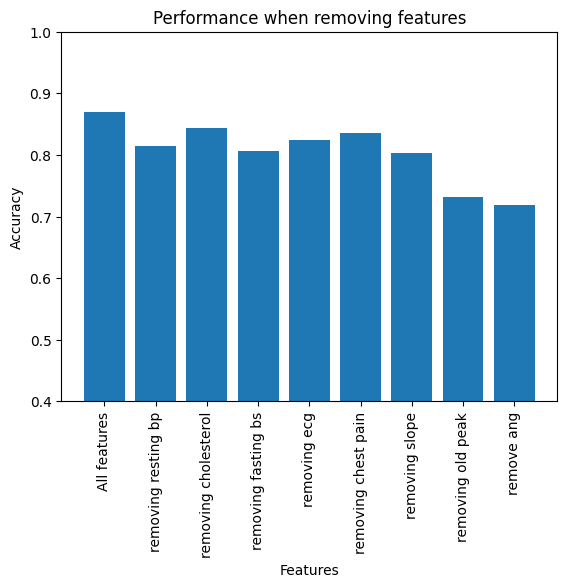

In [132]:
less_rest = less_resting_history.history['val_accuracy'][-1]
less_ch = less_ch_history.history['val_accuracy'][-1]
less_fast = less_fasting_history.history['val_accuracy'][-1]
less_ecg = less_ecg_history.history['val_accuracy'][-1]
less_slop = less_slope_history.history['val_accuracy'][-1]
less_ang = less_ang_history.history['val_accuracy'][-1]
less_chest = less_chest_history.history['val_accuracy'][-1]
less_old = less_old_history.history['val_accuracy'][-1]
all = three_layer_history.history['val_accuracy'][-1]

three_layer_history.history
def plot_feature_reduction():
  cols = ['All features', 'removing resting bp', 'removing cholesterol', 'removing fasting bs', 'removing ecg', 'removing chest pain', 'removing slope', 'removing old peak', 'remove ang']
  vals = [all, less_rest, less_ch, less_fast, less_ecg, less_chest, less_slop, less_old, less_ang]
  plt.bar(cols, vals)
  plt.ylabel('Accuracy')
  plt.xlabel('Features')
  plt.ylim(.4, 1)
  plt.title('Performance when removing features')
  plt.xticks(rotation=90)
  plt.show()

plot_feature_reduction()